In [1]:
#! pip install openpyxl

In [2]:
import pandas as pd

In [3]:
# Load the unified data set
df = pd.read_excel('../data/raw_data.xlsx', sheet_name='raw_data', header=0)

# Exploratory Data Analysis:

In [4]:
#Check it worked and that the columns have the names
df.head(10)

,x,y
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [5]:
# Check the shape to know if it matched the description of the data  (3000 rows)
df.shape

(3000, 2)

In [6]:
#Lets start by looking at the data set in general:
df.info()
#It can be seen there are no null values
#The x contains object = str while y is just 1 or 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x       3000 non-null   object
 1   y       3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [7]:
# This will only apply to y, but anyway... We'll do it
df.describe()

,y
count,3000.000000
mean,0.500000
std,0.500083
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [8]:
#Check for empty values again
df.isnull().sum()

x    0
y    0
dtype: int64

In [9]:
# Forgot to do this earlier, let's check for duplicates
df.duplicated().sum()

np.int64(17)

In [ ]:
# Let's see what was duplicated
df[df.duplicated()]


,x,y
285,Great phone!.,1
407,Works great.,1
524,Works great!.,1
543,Don't buy this product.,0
744,If you like a loud buzzing to override all you...,0
748,Does not fit.,0
778,This is a great deal.,1
792,Great Phone.,1
892,Excellent product for the price.,1
896,Great phone.,1


In [13]:
# Finally, lets drop duplicates
df = df.drop_duplicates()

In [16]:
# Check for the target variable balance
print(df['y'].value_counts())
print(df['y'].value_counts(normalize=True))

#So the data set is pretty much balanced until now

y
0    1493
1    1490
Name: count, dtype: int64
y
0    0.500503
1    0.499497
Name: proportion, dtype: float64


In [17]:
#Lets check for character and text length i guess...
df['char_len'] = df['x'].str.len()
df['word_len'] = df['x'].str.split().str.len()

df[['char_len','word_len']].describe()

#So in character length there is an average of 65 characters with an avg of 12 words.
#There are some weird ones that are a lot shorter and a lot longer

,char_len,word_len
count,2983.000000,2983.000000
mean,65.469661,11.873952
std,44.118085,7.867971
min,7.000000,1.000000
25%,33.000000,6.000000
50%,56.000000,10.000000
75%,88.000000,16.000000
max,479.000000,71.000000


<Axes: ylabel='Frequency'>

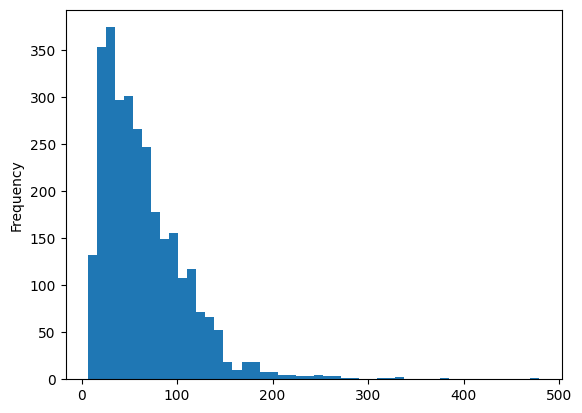

In [18]:
#Here ill just see the distribution of charater length
df['char_len'].plot(kind='hist', bins=50)
#It looks like a poisson or log normal distrution

<Axes: ylabel='Frequency'>

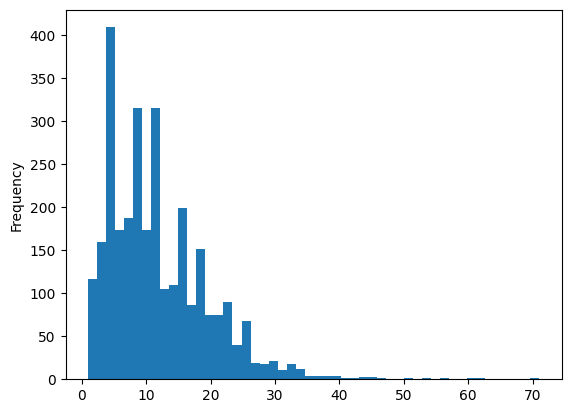

In [19]:
#Now lets do the same for word length
df['word_len'].plot(kind='hist', bins=50)
#This one has some clear spikes but still looks like a poisson distribution

In [20]:
#Lets see the difference in word length groups by the target variable
df.groupby('y')['word_len'].describe()
#It shows that they have basically the same length, but the max differs a bit.

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
0,1493.0,11.913597,7.596292,1.0,6.0,10.0,16.0,56.0
1,1490.0,11.834228,8.133459,1.0,6.0,10.0,16.0,71.0


In [21]:
#Here we are going to check for the most common words that are positive and negative
from collections import Counter

pos_words = Counter(" ".join(df[df['y']==1]['x']).split()).most_common(10)
neg_words = Counter(" ".join(df[df['y']==0]['x']).split()).most_common(10)

print(pos_words)
print(neg_words)

#All this transitive words will need to be removed in the cleaning process.

[('the', 762), ('and', 654), ('a', 443), ('is', 407), ('I', 396), ('of', 303), ('to', 299), ('was', 252), ('The', 225), ('this', 215)]
[('the', 711), ('I', 452), ('and', 441), ('a', 402), ('to', 353), ('is', 322), ('of', 305), ('was', 304), ('The', 236), ('it', 231)]


# Cleaning Part:

In [22]:
#Import th nltk libraries to process the text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [23]:
#I want to see how each step changes the text (taken from the workshop that was assigned)
#Just found a random line with text with various issues
random_text = df.iloc[3,0]
print(random_text)

Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!


In [24]:
# I did the suggest process for preprocessing but im adding two more steps

#Before doing the suggested process I will be:
# removing all punctuation ("!", ",", ".", "?", etc) replacing it with spaces.
# Getting this from a case where minutes.major was stuck together.
import re
random_text = re.sub(r'[^\w\s]', ' ', random_text)

print(random_text)


Tied to charger for conversations lasting more than 45 minutes MAJOR PROBLEMS  


In [25]:
#Next get rid of all unnecesary spaces at either side and in between
random_text = ' '.join(random_text.split())
print(random_text)

Tied to charger for conversations lasting more than 45 minutes MAJOR PROBLEMS


In [26]:
#Now we start the recommended process
# First check what tokenization does
tokens = word_tokenize(random_text)
print(tokens)
# Interestingly, things like minutes.Major are stuck together and ! are separated

['Tied', 'to', 'charger', 'for', 'conversations', 'lasting', 'more', 'than', '45', 'minutes', 'MAJOR', 'PROBLEMS']


In [27]:
# Now lets see the result of lowercasing
tokens = [token.lower() for token in tokens]
print(tokens)

['tied', 'to', 'charger', 'for', 'conversations', 'lasting', 'more', 'than', '45', 'minutes', 'major', 'problems']


In [28]:
# Now we remove the stop words using the defined ones in nltk
stop_words = set(stopwords.words('english'))
tokens = [token for token in tokens if token not in stop_words]
print(tokens)
# Cool! this removed transitive words like: to, for, more, than...

['tied', 'charger', 'conversations', 'lasting', '45', 'minutes', 'major', 'problems']


In [29]:
#According to the steps we must use the "lemmatize"
lemmatizer = WordNetLemmatizer()
tokens = [lemmatizer.lemmatize(token) for token in tokens]
print(tokens)

#This changed the plural to singular
#Read this can change words to different versions if you consider them as verbs, adjectives, etc.

['tied', 'charger', 'conversation', 'lasting', '45', 'minute', 'major', 'problem']


In [30]:
#Finally paste the tokens back together
back_together = ' '.join(tokens)
print(back_together)

tied charger conversation lasting 45 minute major problem


In [31]:
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    
    # Repeate the Steps Outside

    # 1. Remove all punctuation by replacing with spaces
    text = re.sub(r"[^\w\s]", " ", text)

    # 2. Normalize spaces
    text = " ".join(text.split())

    # 3. Tokenize
    tokens = word_tokenize(text)

    # 4. Lowercase
    tokens = [token.lower() for token in tokens]

    # 5. Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]

    # 6. Lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # 7. Join back into text
    return " ".join(tokens)


In [32]:
# Now apply all changes to the actual data set.
df['clean'] = df['x'].apply(preprocess_text)
df[['x','clean']]

,x,clean
0,So there is no way for me to plug it in here i...,way plug u unless go converter
1,"Good case, Excellent value.",good case excellent value
2,Great for the jawbone.,great jawbone
3,Tied to charger for conversations lasting more...,tied charger conversation lasting 45 minute ma...
4,The mic is great.,mic great
...,...,...
2995,I think food should have flavor and texture an...,think food flavor texture lacking
2996,Appetite instantly gone.,appetite instantly gone
2997,Overall I was not impressed and would not go b...,overall impressed would go back
2998,"The whole experience was underwhelming, and I ...",whole experience underwhelming think go ninja ...


# Now let see how some of the exploratory values changed

In [33]:
df.isnull().sum()

x           0
y           0
char_len    0
word_len    0
clean       0
dtype: int64

In [37]:
# since alot of words got removed, some might be duplicated again
df[df[['clean','y']].duplicated()]

,x,y,char_len,word_len,clean
143,very disappointed.,0,18,2,disappointed
262,Works great.,1,12,2,work great
290,Great Phone.,1,12,2,great phone
300,Sending it back.,0,16,3,sending back
366,Waste of money.,0,15,3,waste money
...,...,...,...,...,...
2821,Do not waste your money here!,0,29,6,waste money
2834,They were excellent.,1,20,3,excellent
2908,We won't be returning.,0,22,4,returning
2947,I was VERY disappointed!!,0,25,4,disappointed


In [38]:
# Remove duplicates again taking into account the cleaned test and the target variable
df = df.drop_duplicates(subset=['clean','y'])

In [41]:
#Count characters and words
df.loc[:, 'clean_char_len'] = df['clean'].str.len()
df.loc[:, 'clean_word_len'] = df['clean'].str.split().str.len()
df[['clean_char_len','clean_word_len']].describe()


#The max length did change quite a bit
#The all the statistics were reduced. So a bunch of words were cut out.

,clean_char_len,clean_word_len
count,2922.000000,2922.000000
mean,40.580424,6.223819
std,28.898218,4.180604
min,0.000000,0.000000
25%,20.000000,3.000000
50%,33.000000,5.000000
75%,53.000000,8.000000
max,344.000000,44.000000


<Axes: ylabel='Frequency'>

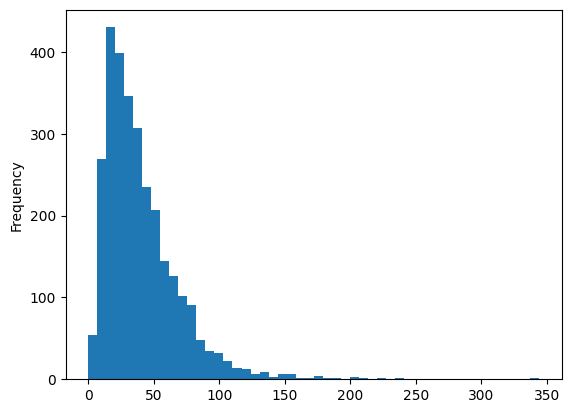

In [42]:
#Here ill just see the distribution of charater length
df['clean_char_len'].plot(kind='hist', bins=50)
#It keeps the general structure of the original data

<Axes: ylabel='Frequency'>

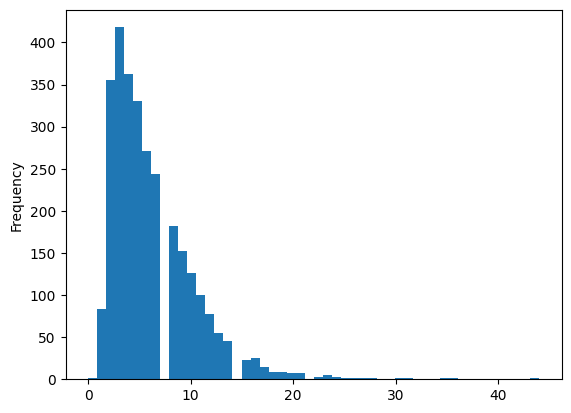

In [43]:
#Now check the words count distribution again
df['clean_word_len'].plot(kind='hist', bins=50)
#It keeps the general structure of the original data, but the extreme differences were removed and there are
#some ranges that don't appear anymore.

In [44]:
#Now check the distirbution based on the target variable again!
df.groupby('y')['clean_word_len'].describe()

#All the statistics were reduced but they are still pretty much the same
#There does appear that in the negative ones where deleted and have no words

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
0,1456.0,6.087225,3.918756,0.0,3.0,5.0,8.0,31.0
1,1466.0,6.359482,4.422526,1.0,3.0,5.0,8.0,44.0


In [45]:
#Finally lets check positive and negative words without the filler words
pos_words = Counter(" ".join(df[df['y']==1]['clean']).split()).most_common(10)
neg_words = Counter(" ".join(df[df['y']==0]['clean']).split()).most_common(10)

print(pos_words)
print(neg_words)

[('great', 187), ('good', 175), ('film', 119), ('movie', 102), ('phone', 85), ('one', 76), ('well', 68), ('best', 63), ('work', 62), ('place', 62)]
[('movie', 108), ('bad', 99), ('phone', 84), ('one', 73), ('time', 73), ('like', 68), ('film', 68), ('food', 66), ('place', 59), ('would', 58)]


In [46]:
#Now make the actual file with corrected data and used for preprocessing
df.to_excel("../data/cleaned_data.xlsx", index=False)
